##### WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key_main import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#this is a random set, so the list will always be a different length
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list, filter out duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


##### Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
##### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get( city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | kayyerkan
Processing Record 7 of Set 1 | kingston
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | minas de marcona
Processing Record 10 of Set 1 | brigantine
Processing Record 11 of Set 1 | hastings
Processing Record 12 of Set 1 | whangarei
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | ngorongoro
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | shihezi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Re

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,11.41,63,0,2.57,US,1699053973
1,waitangi,-43.9535,-176.5597,16.57,94,82,3.13,NZ,1699053963
2,bilibino,68.0546,166.4372,-12.94,94,100,1.62,RU,1699053970
3,luderitz,-26.6481,15.1594,15.87,81,0,5.30,NA,1699054072
4,west island,-12.1568,96.8225,24.99,83,75,5.66,CC,1699053994


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,11.41,63,0,2.57,US,1699053973
1,waitangi,-43.9535,-176.5597,16.57,94,82,3.13,NZ,1699053963
2,bilibino,68.0546,166.4372,-12.94,94,100,1.62,RU,1699053970
3,luderitz,-26.6481,15.1594,15.87,81,0,5.30,NaN,1699054072
4,west island,-12.1568,96.8225,24.99,83,75,5.66,CC,1699053994


#### Create the Scatter Plots Requested

##### Latitude Vs. Temperature

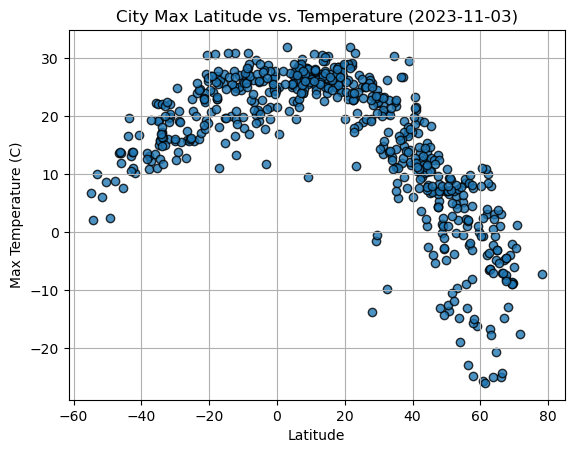

In [27]:
# Build scatter plot for latitude vs. temperature
# x_values = city_data_df['Lat']
# y_values = city_data_df['Max Temp']
# plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

##### Latitude Vs. Humidity

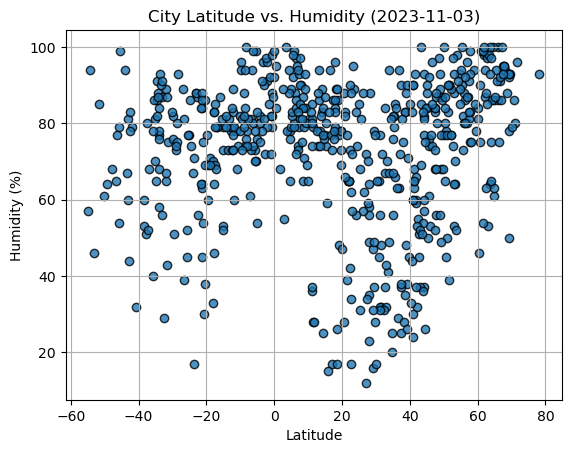

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

##### Latitude Vs. Cloudiness

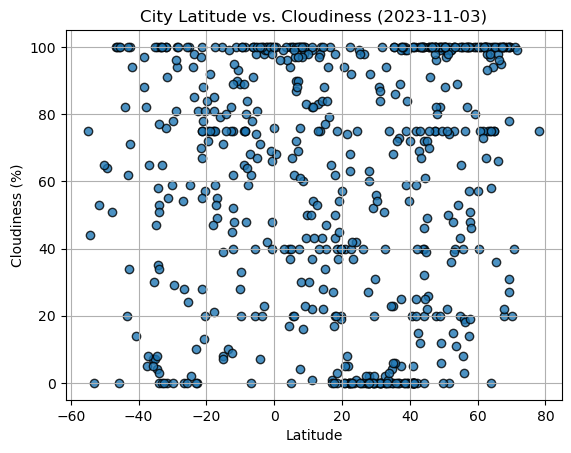

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

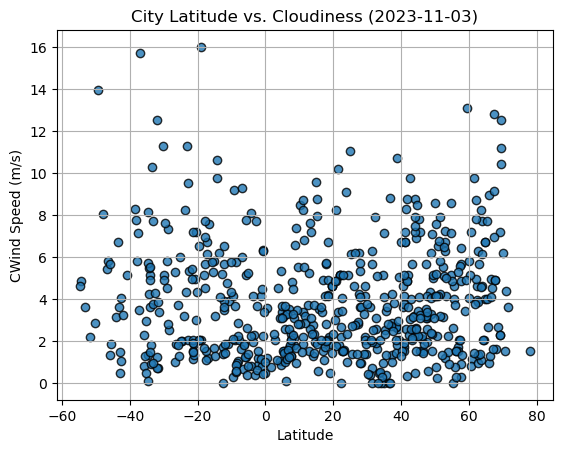

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('CWind Speed (m/s)')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

#### Requirement 2: Compute Linear Regression for Each Relationship

In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,11.41,63,0,2.57,US,1699053973
2,bilibino,68.0546,166.4372,-12.94,94,100,1.62,RU,1699053970
5,kayyerkan,69.3786,87.7439,-8.72,78,100,11.20,RU,1699054272
6,kingston,17.9970,-76.7936,28.53,84,20,5.66,JM,1699054014
9,brigantine,39.4101,-74.3646,11.68,71,0,2.06,US,1699054273


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,16.57,94,82,3.13,NZ,1699053963
3,luderitz,-26.6481,15.1594,15.87,81,0,5.30,NaN,1699054072
4,west island,-12.1568,96.8225,24.99,83,75,5.66,CC,1699053994
7,edinburgh of the seven seas,-37.0676,-12.3116,12.40,68,65,15.71,SH,1699053965
8,minas de marcona,-15.2119,-75.1103,15.46,73,8,5.82,PE,1699054050


####  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7139427287991654


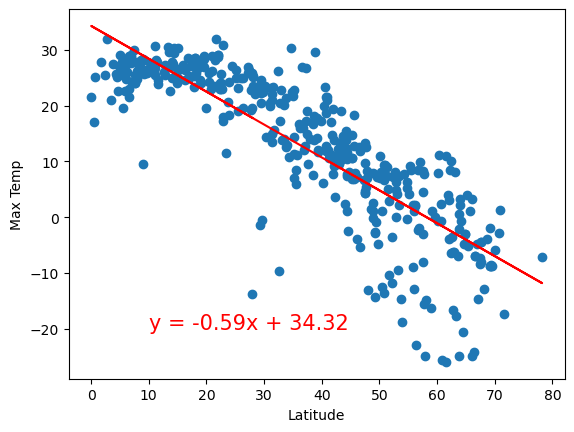

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(10,-20))

The r-value is: 0.5310299576238013


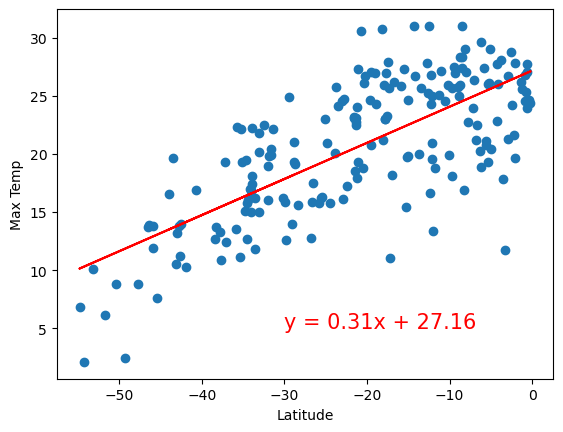

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-30,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.021055824116990664


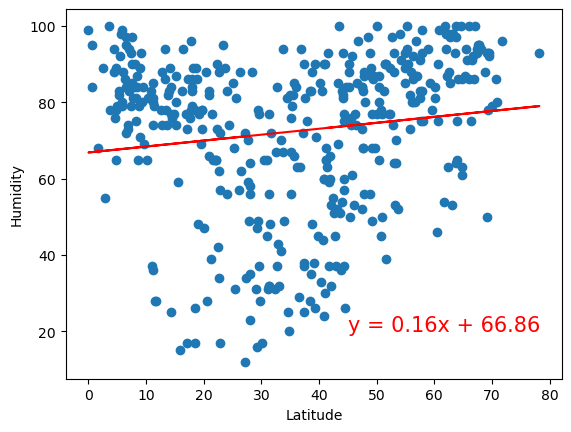

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(45,20))

The r-value is: 0.07662301149429261


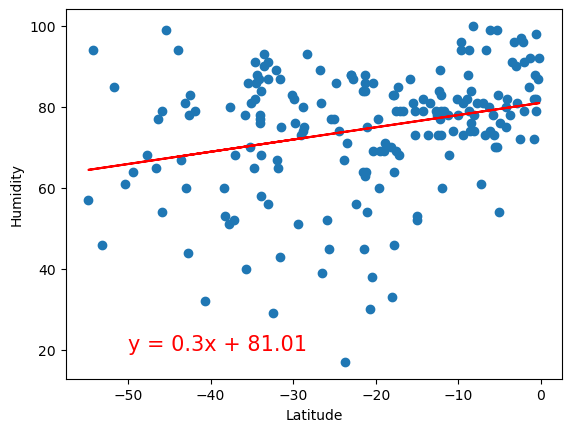

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.029634378384971335


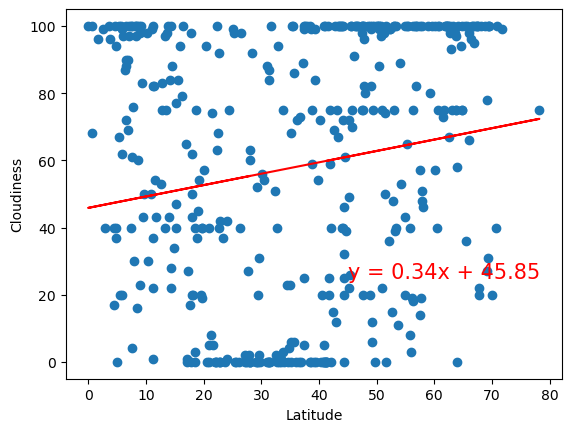

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(45,25))

The r-value is: 0.037765350698419964


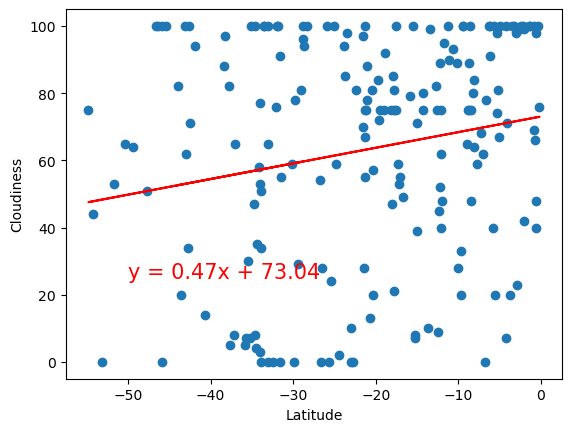

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-50,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.044605940710456475


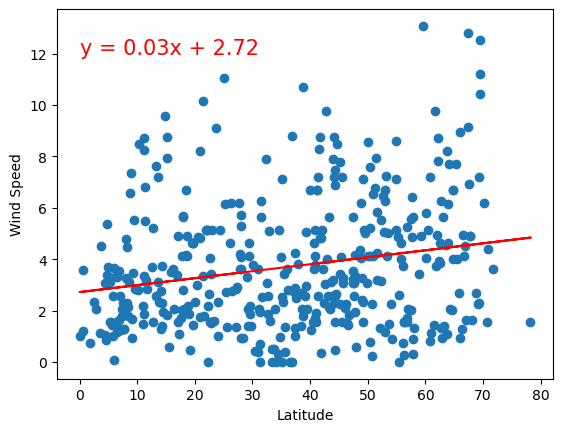

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(0,12))

The r-value is: 0.03422886495981245


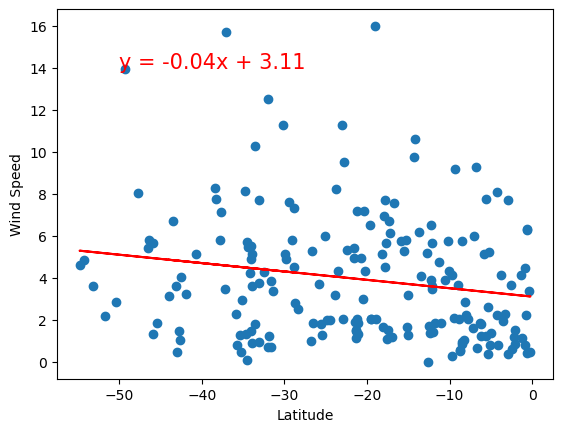

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-50,14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE